# Perkenalan

Nama : Salman Faishal

Batch : 017

Objective : Memprediksi nutrisi tanaman

Deployment : https://huggingface.co/spaces/salmanfaishal27/aria-dataset

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import json
import pickle

In [2]:
data = pd.read_excel('aria_data.xlsx')
data.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [3]:
data.shape

(160, 10)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.130000,4.600000,4.720000,4.890000,5.260000
v1,160.0,389.892437,148.673511,227.285714,268.608333,295.162500,536.409375,678.375000
v2,160.0,237.442677,70.128690,178.800000,194.029018,204.187500,244.716667,422.812500
v3,160.0,480.573041,118.798984,348.933333,384.419643,414.383929,591.611404,722.312500
v4,160.0,394.109622,63.060442,313.733333,353.181250,370.741667,424.131250,558.500000
v5,160.0,487.316520,100.941711,373.333333,418.583333,456.031250,496.475000,721.000000
v6,160.0,251.450820,59.634652,189.200000,213.000000,226.062500,262.531250,415.375000
v7,160.0,714.737926,51.148098,586.266667,678.385417,718.833333,751.446875,853.466667
v8,160.0,4456.913233,335.035933,3725.666667,4273.437500,4554.766667,4700.612500,5086.375000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [6]:
data.isna().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.sample_type.value_counts()

lab 1    100
lab 2     60
Name: sample_type, dtype: int64

# Exploratory Data Analysis (EDA)

## Sample_type

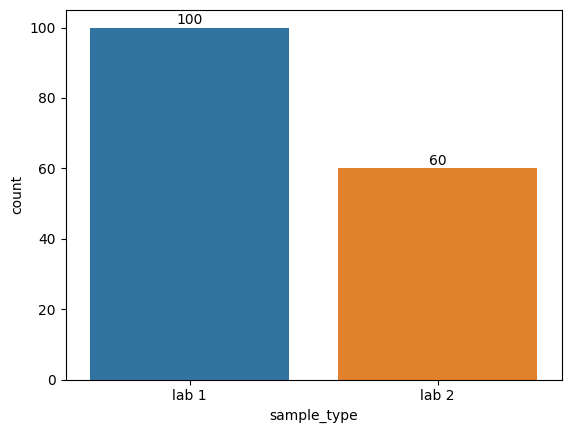

In [9]:
ax = sns.countplot(x = data.sample_type)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

dari grafik diatas sample type memiliki 2 label yaitu lab 1 dan lab 2, dimana lab 1 memiliki jumlah yang paling banyak dengan jumlah 100 dan lab 2 sebanyak 60

## target

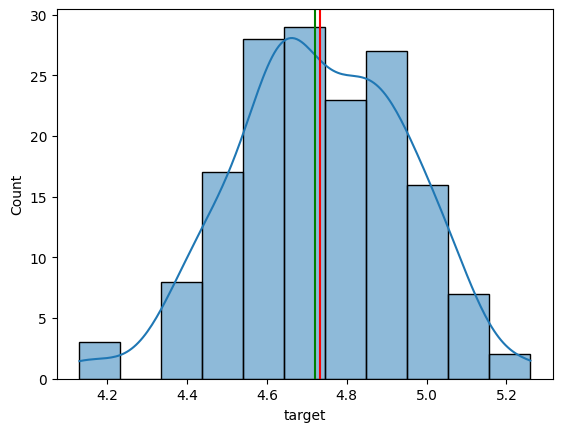

Min : 4.13
Max : 5.26
Skewness : -0.15828173643344287
Mean : 4.73375
Median : 4.720000000000001


In [10]:
sns.histplot(data.target, kde=True)
plt.axvline(data.target.mean(), color='r', label='Mean')
plt.axvline(data.target.median(), color='g', label='Median')
plt.show()
print('Min :', data.target.min())
print('Max :', data.target.max())
print('Skewness :', data.target.skew())
print('Mean :', data.target.mean())
print('Median :', data.target.median())

pada kolom target nilai minimum yaitu sebesar 4.13 dan nilai maksimum 5.26, distribusi pada kolom target ini normal dengan nilai skewness -0.16, dan rata rata nilai pada kolom target ini adalah 4.73 dengan nilai tengah 4.72

## v1

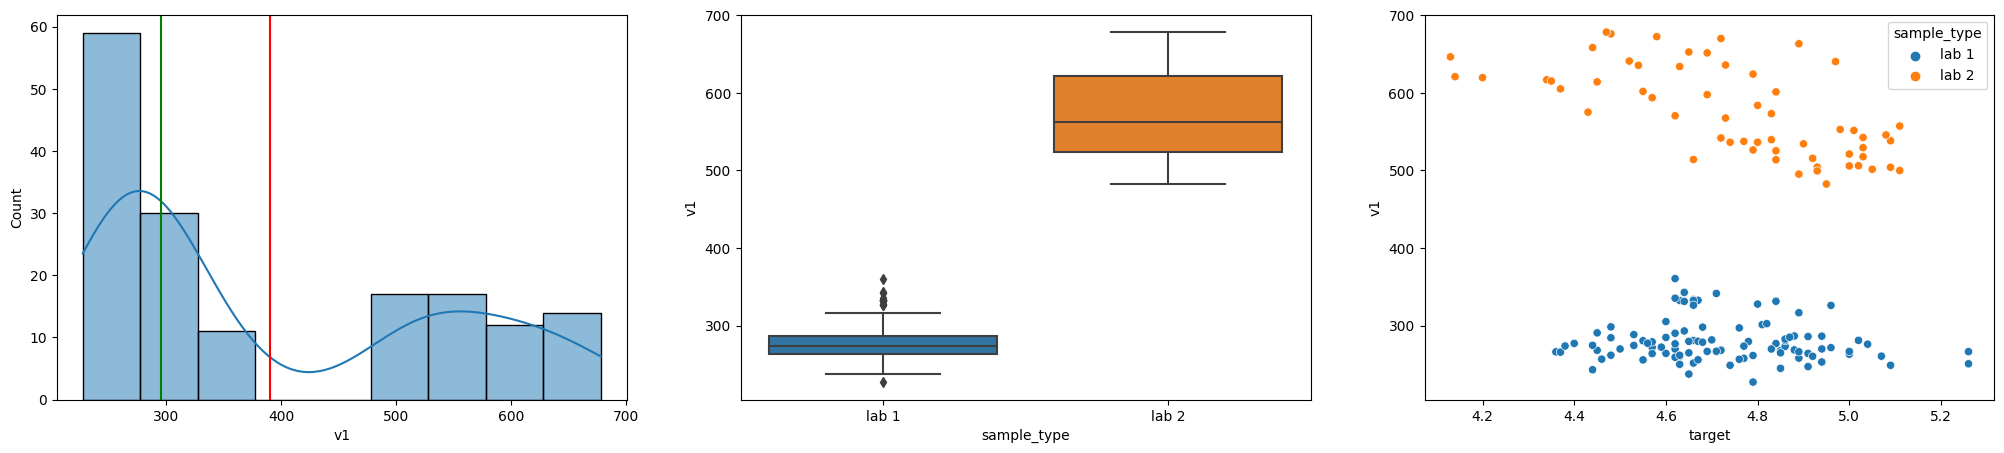

Skewness : 0.6399112607855549
Min : 227.285714285714
Max : 678.375
Mean : 389.8924368212196
Median : 295.1625


In [11]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v1, kde=True)
plt.axvline(data.v1.mean(), color='r', label='Mean')
plt.axvline(data.v1.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v1', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v1', hue='sample_type',data = data)
plt.show()
print('Skewness :', data.v1.skew())
print('Min :', data.v1.min())
print('Max :', data.v1.max())
print('Mean :', data.v1.mean())
print('Median :', data.v1.median())

Pada kolom v1 kolom ini terdistribusi skewness dengan nilai skewness sebesar 0.64, rata rata 390, nilai tengah 295 dimana nilai minimal sebesar 227 dan nilai maksimum 678, pada boxplot juga terlihat bahwa kolom v1 memiliki nilai kurang dari 400 untuk lab 1 dan lebih dari 450 untuk lab 2 

## v2

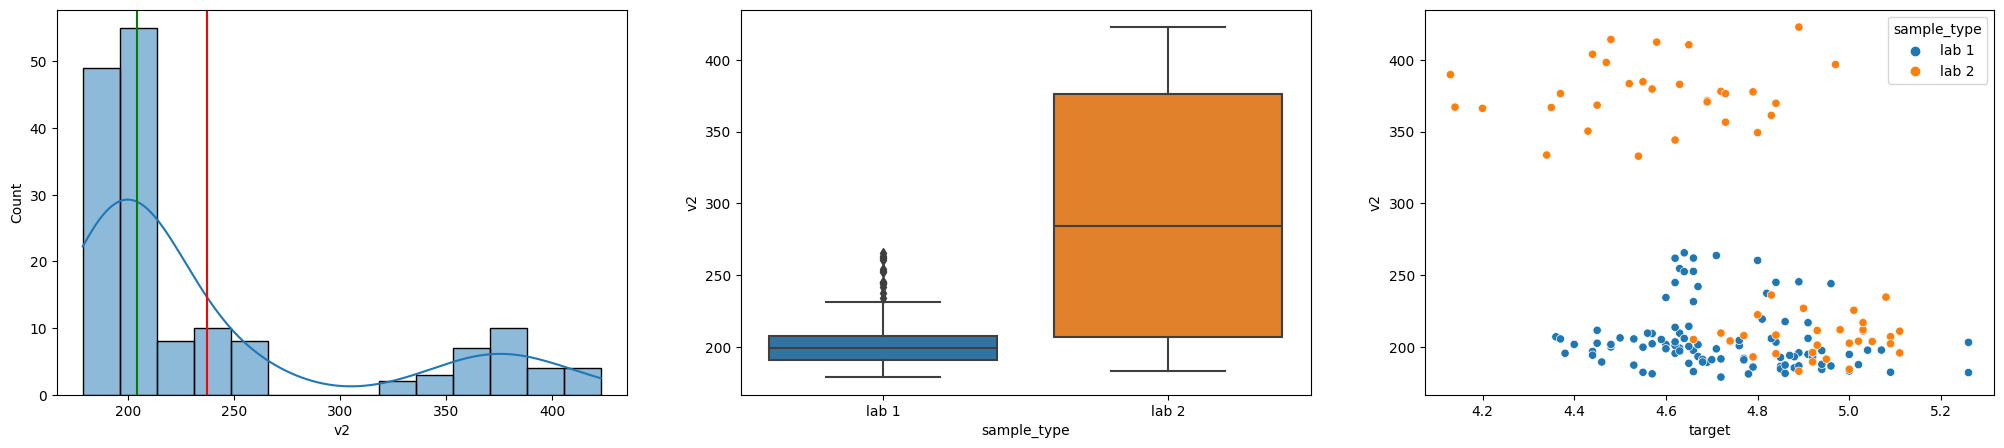

Median : 204.1875
Min : 178.8
Max : 422.8125
Skewness : 1.4617281099191999
Mean : 237.44267733134902


In [12]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v2, kde=True)
plt.axvline(data.v2.mean(), color='r', label='Mean')
plt.axvline(data.v2.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v2', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v2', hue='sample_type',data = data)
plt.show()
print('Median :', data.v2.median())
print('Min :', data.v2.min())
print('Max :', data.v2.max())
print('Skewness :', data.v2.skew())
print('Mean :', data.v2.mean())

Dari grafik v2 dapa dilihat bahwa kolom ini terdistribusi skewness dimana kolom ini memiliki nilai skewness sebesar 1.46, nilai minimum sebesar 179 dan maksimum 423, dengan nilai rata rata 237, pada boxplot terlihat lab 1 ini memiliki nilai v2 yang tidak melebihi 300

## V3

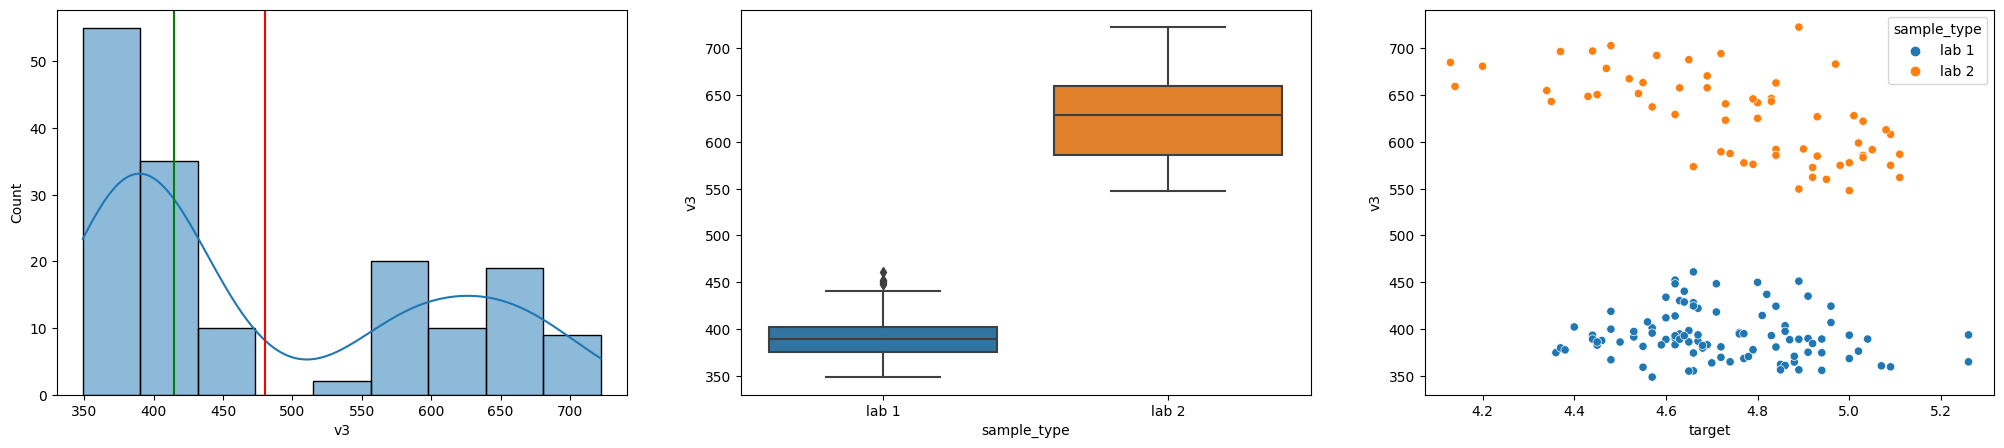

Skewness : 0.6026551795688342
Min : 348.933333333333
Max : 722.3125
Mean : 480.57304139254376
Median : 414.3839285714285


In [13]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v3, kde=True)
plt.axvline(data.v3.mean(), color='r', label='Mean')
plt.axvline(data.v3.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v3', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v3', hue='sample_type',data = data)
plt.show()
print('Skewness :', data.v3.skew())
print('Min :', data.v3.min())
print('Max :', data.v3.max())
print('Mean :', data.v3.mean())
print('Median :', data.v3.median())

Pada khistogram diatas kolom v3 data yang terdistribusi adalah skewness dengan nilai skewness 0.6, dengan nilai minimun sebesar 349 dan maksimal 722, kolom ini juga memiliki nilai rata rata 481 dan nilai tengah 414, pada boxplot juga terlihat bahwa lab 2 memiliki nilai v3 diatas  500 sedangkan untuk lab 1 dibawah 500

## v4

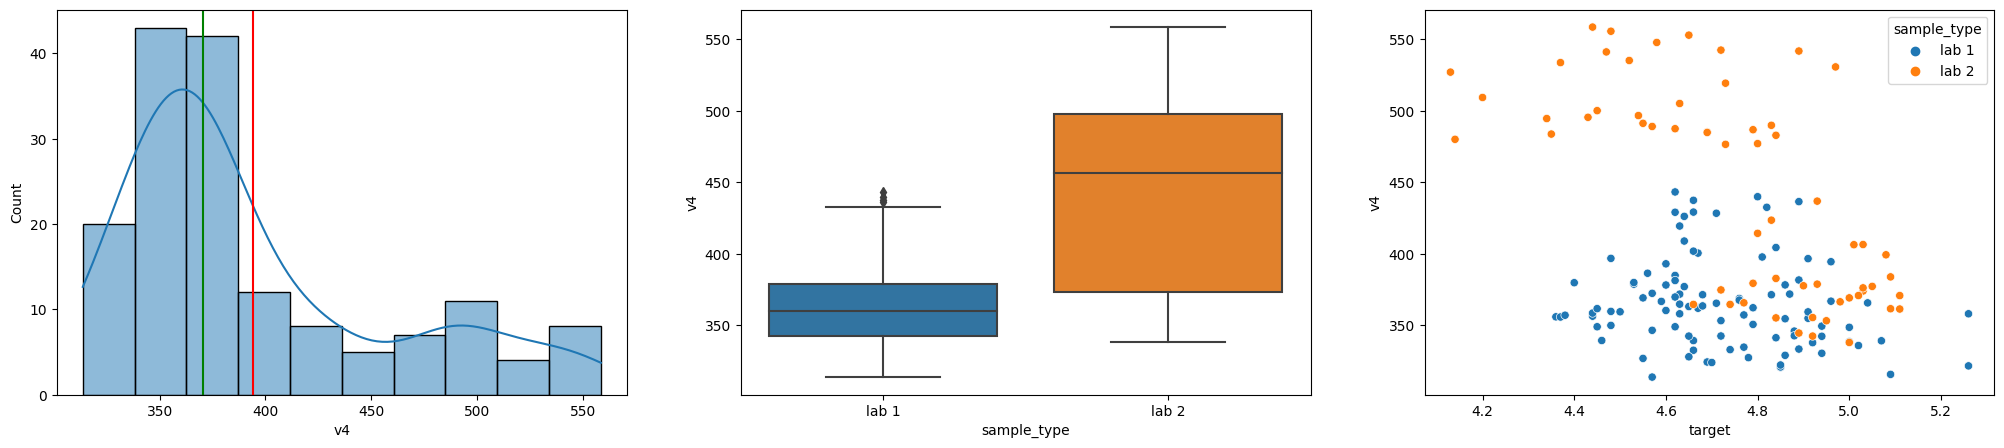

Skewness : 1.1436931932699348
Mean : 394.1096222326648
Median : 370.7416666666665
Min : 313.733333333333
Max : 558.5


In [14]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v4, kde=True)
plt.axvline(data.v4.mean(), color='r', label='Mean')
plt.axvline(data.v4.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v4', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v4', hue='sample_type',data = data)
plt.show()
print('Skewness :', data.v4.skew())
print('Mean :', data.v4.mean())
print('Median :', data.v4.median())
print('Min :', data.v4.min())
print('Max :', data.v4.max())

Pada kolom v4 histogram menunjukan data terdistribusi skewness dengan nilai skewness 1.14, nilai minimal 314 dan maksimal 559 dengan rata rata 394 dan nilai tehgah 370, dari boxplot terlihat bahwa value dari lab 2 lebih tinggi dengan mencapai 550 sedangkan lab 1 dibawah 450

## v5

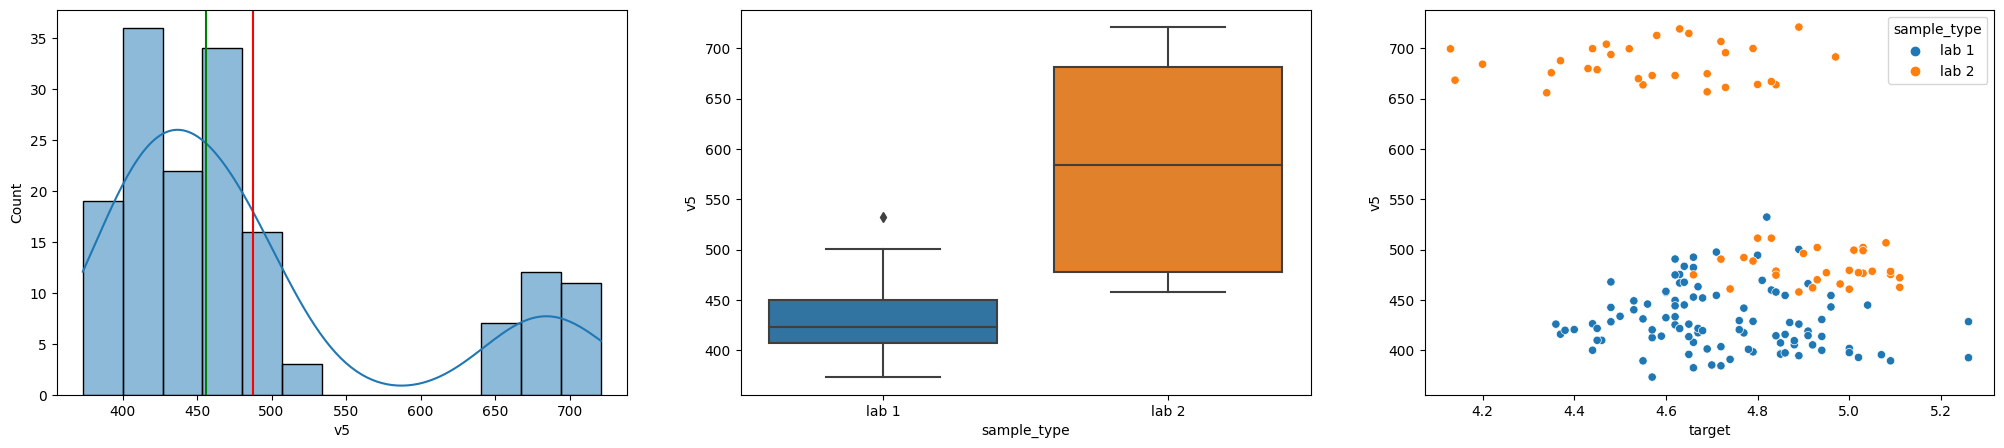

Skewness : 1.2706398850462628
Mean : 487.316519684628
Median : 456.03125
Min : 373.333333333333
Max : 721.0


In [15]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v5, kde=True)
plt.axvline(data.v5.mean(), color='r', label='Mean')
plt.axvline(data.v5.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v5', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v5', hue='sample_type',data = data)
plt.show()
print('Skewness :', data.v5.skew())
print('Mean :', data.v5.mean())
print('Median :', data.v5.median())
print('Min :', data.v5.min())
print('Max :', data.v5.max())

data diatas menunjukan kolom v5 ini memiliki data yang terdistribusi skwness dengan nilai skewness 1.3, nilai minimum 373, nilai maksimum 721 dengan nilai rata rata 487 dan nilai tengah 456, pada boxplot terlihat bahwa lab 1 memiliki nilai yang kurang dari 550 dan lab 2 memiliki nilai lebih dari 700

### v6

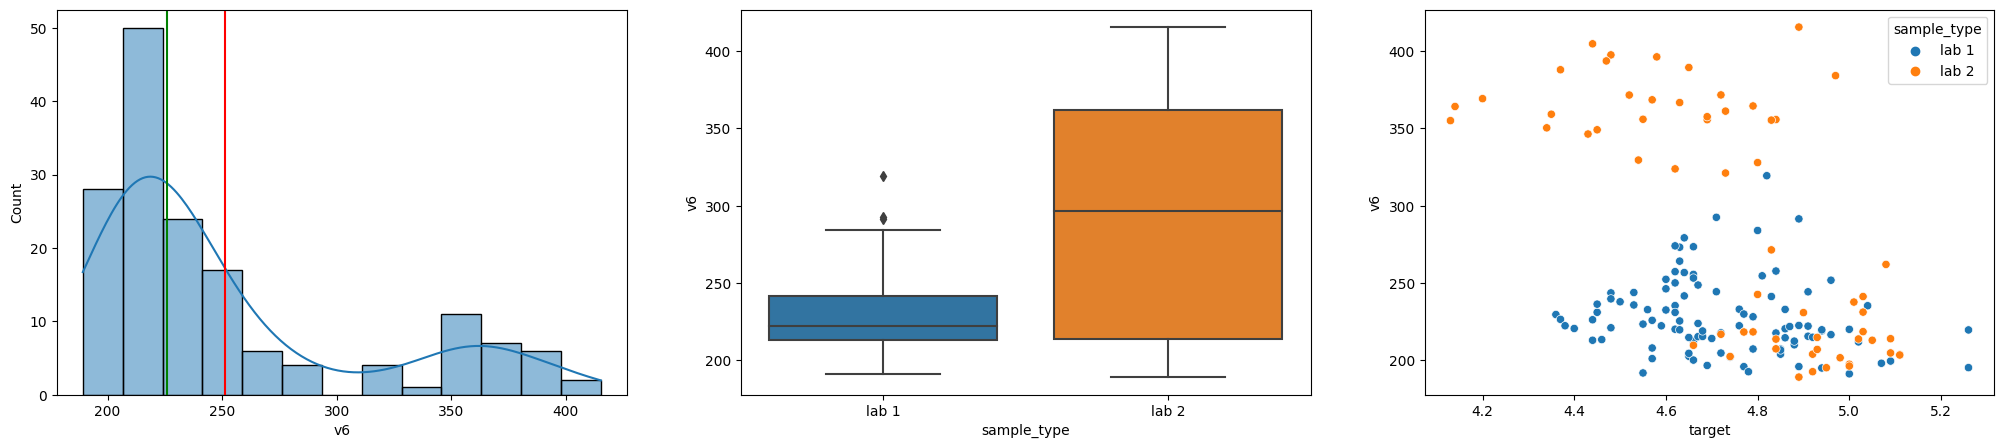

Skewness : 1.2954833782360857
Mean : 251.45082021459885
Median : 226.0625
Min : 189.2
Max : 415.375


In [16]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v6, kde=True)
plt.axvline(data.v6.mean(), color='r', label='Mean')
plt.axvline(data.v6.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v6', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v6', hue='sample_type',data = data)
plt.show()
print('Skewness :', data.v6.skew())
print('Mean :', data.v6.mean())
print('Median :', data.v6.median())
print('Min :', data.v6.min())
print('Max :', data.v6.max())

Dari informasi diatas kolom v6 terdistribusi skewed dengan nilai skewness 1.3, rata rata 251, nilai tengah 226, dengan nilai minimum 189 dan nilai maksimum 415, pada boxplot terlihat pada kolom v6 ini lab 1 memiliki nilai kurang dari 350 dan lab 2 memiliki nilai diatas 350

## v7

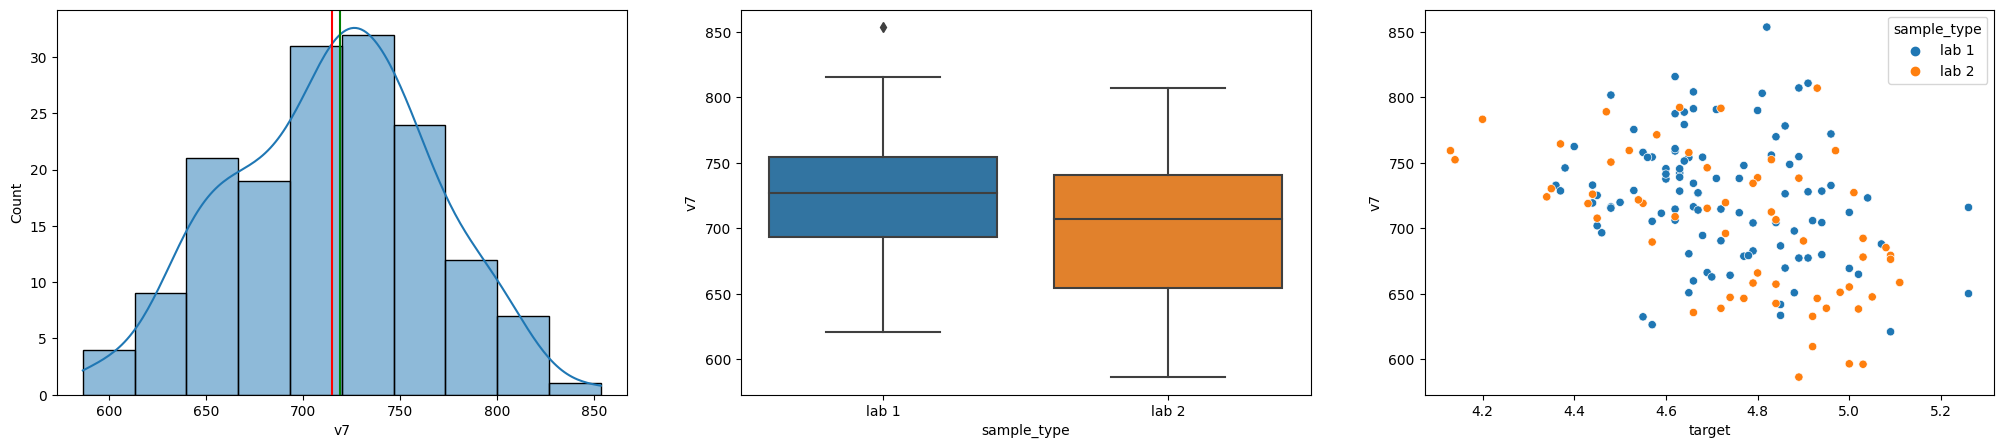

Skewness : -0.10723483952914095
Mean : 714.7379264567667
Median : 718.833333333333
Min : 586.266666666666
Max : 853.466666666666


In [17]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v7, kde=True)
plt.axvline(data.v7.mean(), color='r', label='Mean')
plt.axvline(data.v7.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v7', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v7', hue='sample_type',data = data)
plt.show()
print('Skewness :', data.v7.skew())
print('Mean :', data.v7.mean())
print('Median :', data.v7.median())
print('Min :', data.v7.min())
print('Max :', data.v7.max())

pada grafik diatas kolom v7 terdistribusi normal dengan nilai skewness -0.1, rata rata 715, nilai tengah 719 dengan nilai minimum 586 dan nilai maksimum 853, pada boxplot terlihat lab 1 dengan lab 2 tidak memiliki nilai yang signifikan

## v8

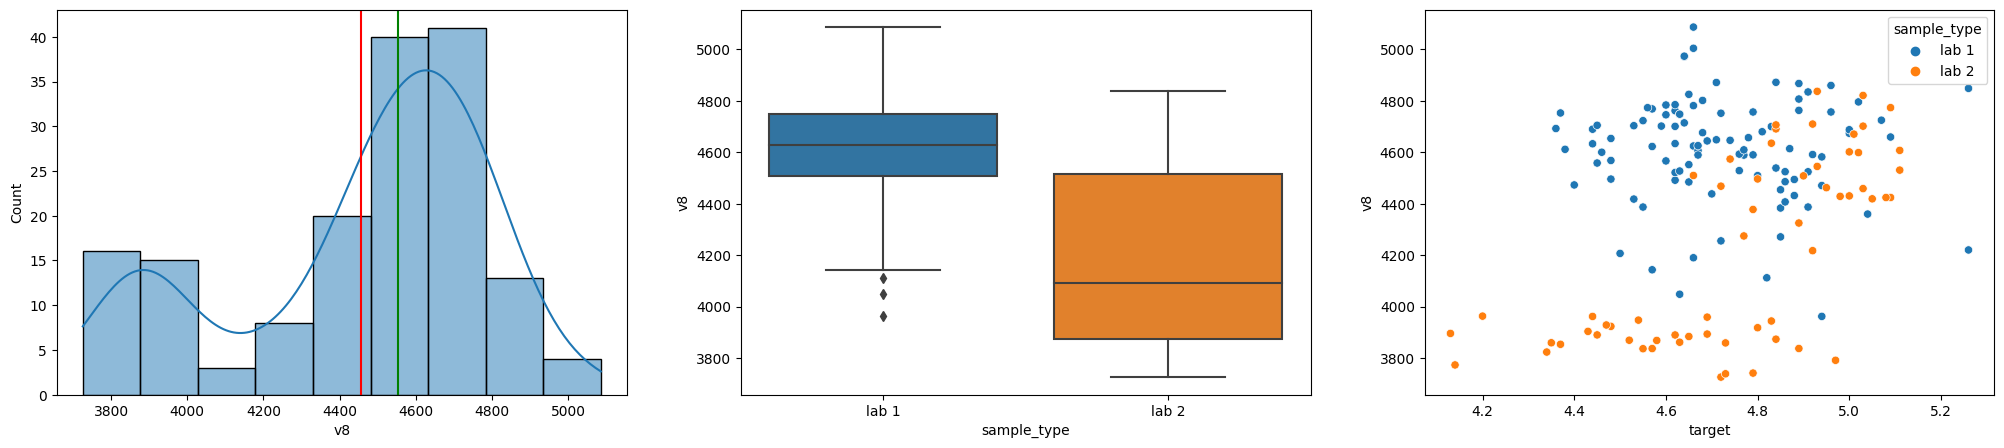

Skewness : -0.7664435142947442
Mean : 4456.91323347431
Median : 4554.76666666666


In [18]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(data.v8, kde=True)
plt.axvline(data.v8.mean(), color='r', label='Mean')
plt.axvline(data.v8.median(), color='g', label='Median')

plt.subplot(1,3,2)
sns.boxplot(x= 'sample_type', y='v8', data = data)

plt.subplot(1,3,3)
sns.scatterplot(x= 'target', y='v8', hue='sample_type',data = data)
plt.show()

print('Skewness :', data.v8.skew())
print('Mean :', data.v8.mean())
print('Median :', data.v8.median())

## Matrix Correlation

C:\Users\salma\AppData\Local\Temp\ipykernel_19452\3309023805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

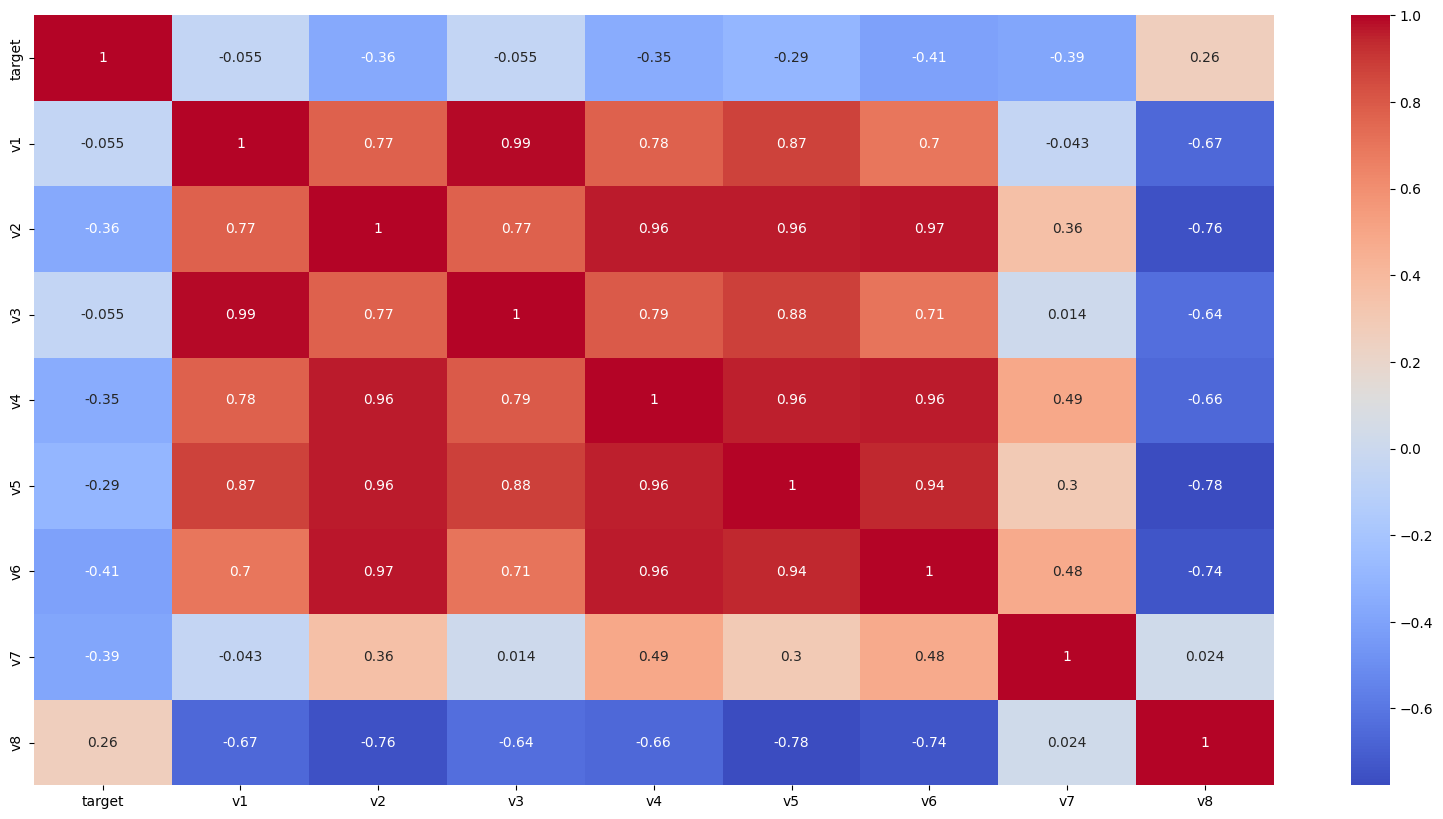

In [19]:
corr = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Data Preprocessing

## Split Data

Pada bagian ini akan dilakukan splitting terhadap dataset untuk dijadikan training set dan testing set. Karena data ini jumlahnya sedikit yang hanya berjumlah 160 baris data saja, maka akan displit dengan perbandingan 9:1, dimana:

- 90 % untuk train set
- 10% untuk testing set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='target'), data[['target']], random_state=82, test_size=0.1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(144, 9)
(16, 9)
(144, 1)
(16, 1)


## Check Outliers

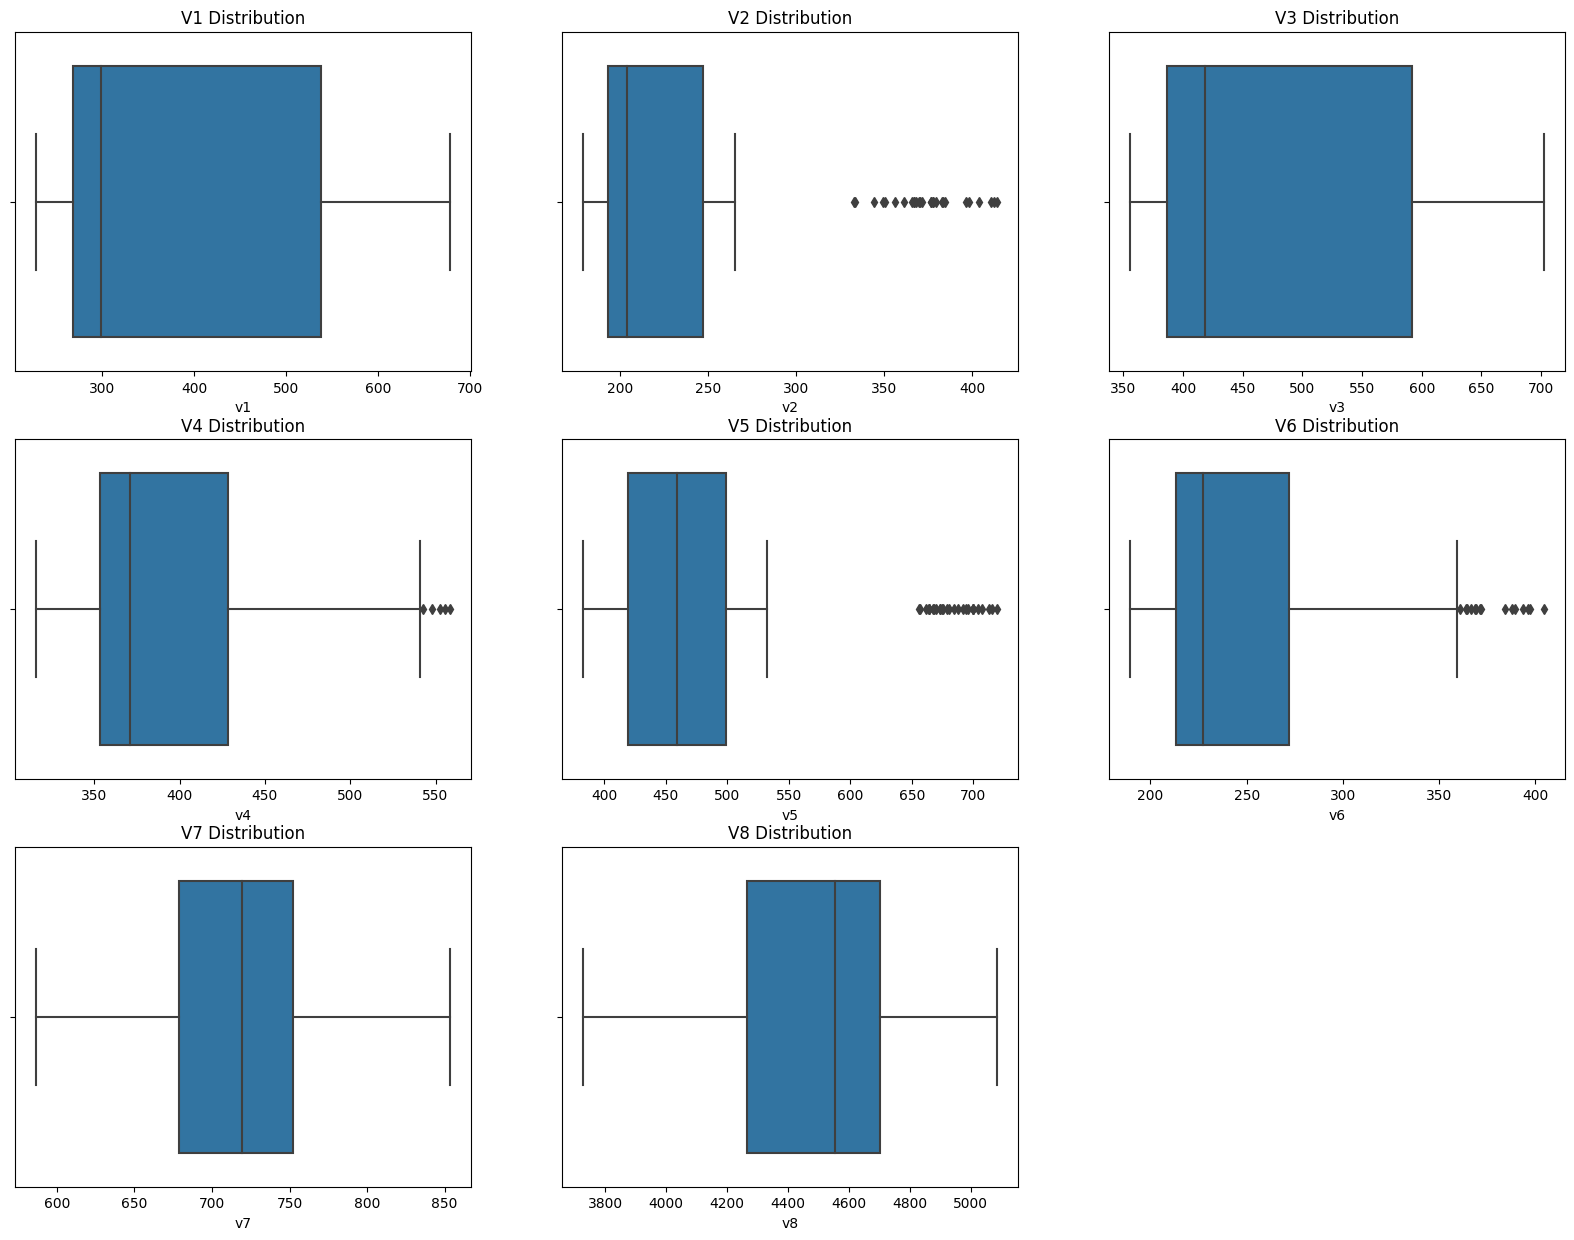

In [22]:
col_out = X_train[['v1','v2', 'v3','v4','v5','v6','v7','v8']]
plt.figure(figsize=(20, 15))
for col in col_out:
    plt.subplot(3, 3, col_out.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=col_out)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

In [23]:
# Func untuk deteksi outlier
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) + 1.5 * IQR
    lower_limit = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

In [24]:
# Check Outliers
cols = X_train[['v1','v2', 'v3','v4','v5','v6','v7','v8']]
cols = cols.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(X_train, cols[i]).shape[0] / X_train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,v1,0.00
1,v2,19.44
2,v3,0.00
3,v4,3.47
4,v5,19.44
5,v6,10.42
6,v7,0.00
7,v8,0.00


In [25]:
# v2_outliers = upper_lower(X_train, 'v2')
# v2_outliers

In [26]:
# v4_outliers = upper_lower(X_train, 'v4')
# v4_outliers

In [27]:
# v5_outliers = upper_lower(X_train, 'v5')
# v5_outliers

In [28]:
# v6_outliers = upper_lower(X_train, 'v6')
# v6_outliers

Outlier pada dataset ini tidak saya handle karena semua outlier ada pada lab 2 yang dimana lab 2 ini memiliki nilai pada kolom v2, v4, v5, v6 lebih tinggi dari lab 1

## Drop Column

In [29]:
# Drop Columns
X_train = X_train.drop(columns=['sample_type'])
X_test = X_test.drop(columns=['sample_type'])

semua kolom pada dataset ini akan digunakan untuk modeling kecuali kolom sample_type, sehingga saya menghapus kolom sample type

## Feature Scaling

In [30]:
# Scale using Standard Scaler
scaler = StandardScaler()

scaler.fit(X_train)
#test = scaler.transform(X_test)

# Convert to dataframe
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Definition

Pada bagian ini akan dibuat 3 model, yaitu :
- SVR
- Random Forest
- linear Regression

In [31]:
# Model Definition
svr = SVR()
rf = RandomForestRegressor()
linreg = LinearRegression()

# Model Training

In [32]:
# Model Training
svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
linreg.fit(X_train_scaled, y_train)


c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\salma\AppData\Local\Temp\ipykernel_19452\712656407.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train)


LinearRegression()

# Model Evaluation

In [33]:
# Evaluate Model
print(f'MAE train set : {mean_absolute_error(y_train, svr.predict(X_train_scaled))}')
print(f'MAE test set  : {mean_absolute_error(y_test, svr.predict(X_test_scaled))}')
print('-'*40)
print(f'RMSE train set : {mean_squared_error(y_train, svr.predict(X_train_scaled))}')
print(f'RMSE test set  : {mean_squared_error(y_test, svr.predict(X_test_scaled))}')
print('-'*40)
print('R2 train set  : ', r2_score(y_train, svr.predict(X_train_scaled)))
print('R2 test set   : ', r2_score(y_test, svr.predict(X_test_scaled)))

MAE train set : 0.13211462683335787
MAE test set  : 0.13787040500308784
----------------------------------------
RMSE train set : 0.025976413062898072
RMSE test set  : 0.029266718036993156
----------------------------------------
R2 train set  :  0.42294668027478155
R2 test set   :  0.4009578705319181


pada model svr akurasi yang didapat adalah 0.42 untuk train set dan 0.41 untuk test set yang berarti model ini goodfit, dengan nilai MAE sebesar 0.13 untuk train set dan 0.15 untuk test set

In [34]:
# Evaluate Model
print(f'MAE train set : {mean_absolute_error(y_train, rf.predict(X_train_scaled))}')
print(f'MAE test set  : {mean_absolute_error(y_test, rf.predict(X_test_scaled))}')
print('-'*40)
print(f'RMSE train set : {mean_squared_error(y_train, rf.predict(X_train_scaled))}')
print(f'RMSE test set  : {mean_squared_error(y_test, rf.predict(X_test_scaled))}')
print('-'*40)
print('R2 train set  : ', r2_score(y_train, rf.predict(X_train_scaled)))
print('R2 test set   : ', r2_score(y_test, rf.predict(X_test_scaled)))

MAE train set : 0.05556805555555552
MAE test set  : 0.1389124999999996
----------------------------------------
RMSE train set : 0.005013625000000003
RMSE test set  : 0.03299176625000004
----------------------------------------
R2 train set  :  0.8886247711297913
R2 test set   :  0.32471219067569546


pada model random forest akurasi yang didapat untukun trainset adalah 0.88  dan untuk test set sebesar 0.19 yang berarti model ini mengalami overfitting, dengan nilai MAE untuk train set sebesar 0.06 dan test set sebesar 0.17

In [35]:
# Evaluate Model
print(f'MAE train set : {mean_absolute_error(y_train, linreg.predict(X_train_scaled))}')
print(f'MAE test set  : {mean_absolute_error(y_test, linreg.predict(X_test_scaled))}')
print('-'*40)
print(f'RMSE train set : {mean_squared_error(y_train, linreg.predict(X_train_scaled))}')
print(f'RMSE test set  : {mean_squared_error(y_test, linreg.predict(X_test_scaled))}')
print('-'*40)
print('R2 train set  : ', r2_score(y_train, linreg.predict(X_train_scaled)))
print('R2 test set   : ', r2_score(y_test, linreg.predict(X_test_scaled)))

MAE train set : 0.14599494823696918
MAE test set  : 0.1518717920013501
----------------------------------------
RMSE train set : 0.0322482487520726
RMSE test set  : 0.03665985689435878
----------------------------------------
R2 train set  :  0.28362091591901994
R2 test set   :  0.24963233963461984


pada model linear regression nilai MAE yang didapat sebesar 0.14 pada train set dan 0.17 pada test set, model ini juga memiliki akurasi untuk train set sebesar 0.286 dan untuk test set 0.231 model ini termasuk goodfit karena akurasi yang didapat pada train set dan test set tidak terlalu jauh

In [36]:
y_test['prediction'] = svr.predict(X_test_scaled)
y_test.reset_index()

,index,target,prediction
0,94,4.60,4.694568
1,58,4.57,4.672553
2,99,4.66,4.727588
3,32,4.57,4.846969
4,119,5.09,4.910524
5,13,4.66,4.732921
6,120,5.02,4.935456
7,2,4.91,4.699169
8,130,4.89,4.650839
9,35,4.85,4.778321


In [37]:
y_test = y_test.reset_index(drop=True)


In [38]:
hasil = []

for i in range(len(y_test)): 
    selisih = y_test['target'][i] - y_test['prediction'][i]
    hasil.append(selisih)

y_test['selisih'] = hasil


In [39]:
y_test

,target,prediction,selisih
0,4.60,4.694568,-0.094568
1,4.57,4.672553,-0.102553
2,4.66,4.727588,-0.067588
3,4.57,4.846969,-0.276969
4,5.09,4.910524,0.179476
5,4.66,4.732921,-0.072921
6,5.02,4.935456,0.084544
7,4.91,4.699169,0.210831
8,4.89,4.650839,0.239161
9,4.85,4.778321,0.071679


# Model Saving

In [40]:
with open('model.pkl', 'wb') as file_model:
  pickle.dump(svr, file_model)

with open('model_scaler.pkl', 'wb') as file_model_scaler:
  pickle.dump(scaler, file_model_scaler)

# Pengambilan Kesimpulan

Kesimpulan yang dapat ditarik dari hasil EDA dan  pemodelan dengan menggunakan 3 model regresi yang berbeda ini adalah:

Dataset yang digunakan adalah dataset dari aria yang memiliki 10 kolom yaitu kolom target, v1 sampai v8 dan sample_type, dari hasil exploratory data analysis lab 2 memiliki nilai yang lebih tinggi dari lab 1 untuk kolom v1, v2, v3, v4, v5, v6 sedangkan pada lab 1 memiliki nilai yang melebihi lab 2 hanya ada pada kolom v7 dan v8, project ini bertujuan untuk melakukan prediksi terhadap kolom target, kolom target yang dimaksud adalah nutrisi tanaman, sehingga dibuatlah 3 model yang berbeda yaitu SVR, Random Forest dan liniear regression, dimana model terbaik dari hasil evaluasi adalah model SVR yang mempunyai perbandingan train set dan test set nya sebesar 0.42 dan 0.4 sehingga bisa dikatan goodfit dan model SVR ini memiliki nilai MAE 0.15